In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

data = pd.read_csv(r'Dataset_UTS_Gasal_2425.csv')
print("\n50 data Pertama:")
print(data.head(50))
print("\ninfo kolom")
print(data.info())
print("\ndeskripsi data")
print(data.describe())


50 data Pertama:
    squaremeters  numberofrooms hasyard haspool  floors  citycode  \
0          75523              3      no     yes      63      9373   
1          55712             58      no     yes      19     34457   
2          86929            100     yes      no      11     98155   
3          51522              3      no      no      61      9047   
4          96470             74     yes      no      21     92029   
5          79770              3      no     yes      69     54812   
6          75985             60     yes      no      67      6517   
7          64169             88      no     yes       6     61711   
8          92383             12      no      no      78     71982   
9          95121             46      no     yes       3      9382   
10         76485             47     yes      no       9     90254   
11         87060             27      no     yes      91     51803   
12         66683             19     yes     yes       6     50801   
13         84559

In [4]:
print("Data Null:\n", data.isnull().sum())
print("\nData Kosong:\n", data.empty)
print("\nData NaN:\n", data.isna().sum())
duplicates = data.duplicated().sum()
print("\nJumlah data duplikat: ", duplicates)

Data Null:
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
price                0
category             0
dtype: int64

Data Kosong:
 False

Data NaN:
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
price                0
category             0
dtype: int64

Jumlah data duplikat:  0


In [5]:
binary_columns = ['hasyard', 'haspool', 'hasstormprotector', 'hasstorageroom', 'isnewbuilt', 'hasguestroom']
for col in binary_columns:
    data[col] = data[col].apply(lambda x: 1 if x == 'yes' else 0)

label_encoder = LabelEncoder()
data['category'] = label_encoder.fit_transform(data['category'])

print("\nData Setelah Konversi:\n", data.head())



Data Setelah Konversi:
    squaremeters  numberofrooms  hasyard  haspool  floors  citycode  \
0         75523              3        0        1      63      9373   
1         55712             58        0        1      19     34457   
2         86929            100        1        0      11     98155   
3         51522              3        0        0      61      9047   
4         96470             74        1        0      21     92029   

   citypartrange  numprevowners  made  isnewbuilt  hasstormprotector  \
0              3              8  2005           0                  1   
1              6              8  2021           0                  0   
2              3              4  2003           0                  0   
3              8              3  2012           0                  1   
4              4              2  2011           0                  1   

   basement  attic  garage  hasstorageroom  hasguestroom      price  category  
0      4313   9005     956               

In [6]:
X = data.drop(columns=['price', 'category'])
y = data['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40, stratify=y)

print(f"\nX_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")



X_train shape: (7500, 16), X_test shape: (2500, 16)
y_train shape: (7500,), y_test shape: (2500,)


In [7]:
pipelines_standard = {
    'RandomForest_SelectKBest': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectKBest(f_classif)),
        ('classifier', RandomForestClassifier(random_state=40))
    ]),
    'RandomForest_SelectPercentile': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectPercentile(f_classif)),
        ('classifier', RandomForestClassifier(random_state=40))
    ]),
    'LogisticRegression_SelectKBest': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectKBest(f_classif)),
        ('classifier', LogisticRegression(max_iter=2000, random_state=40))
    ]),
    'LogisticRegression_SelectPercentile': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectPercentile(f_classif)),
        ('classifier', LogisticRegression(max_iter=2000, random_state=40))
    ])
}

pipelines_minmax = {
    'RandomForest_SelectKBest': Pipeline([
        ('scaler', MinMaxScaler()),
        ('feature_selection', SelectKBest(f_classif)),
        ('classifier', RandomForestClassifier(random_state=40))
    ]),
    'RandomForest_SelectPercentile': Pipeline([
        ('scaler', MinMaxScaler()),
        ('feature_selection', SelectPercentile(f_classif)),
        ('classifier', RandomForestClassifier(random_state=40))
    ]),
    'LogisticRegression_SelectKBest': Pipeline([
        ('scaler', MinMaxScaler()),
        ('feature_selection', SelectKBest(f_classif)),
        ('classifier', LogisticRegression(max_iter=2000, random_state=40))
    ]),
    'LogisticRegression_SelectPercentile': Pipeline([
        ('scaler', MinMaxScaler()),
        ('feature_selection', SelectPercentile(f_classif)),
        ('classifier', LogisticRegression(max_iter=2000, random_state=40))
    ])
}

In [8]:
param_grid = {
    'RandomForest_SelectKBest': {
        'feature_selection__k': [5, 10, 15],
        'classifier__n_estimators': [1000, 2000, 3000],
        'classifier__max_depth': [None, 20, 30]
    },
    'RandomForest_SelectPercentile': {
        'feature_selection__percentile': [25, 50, 75],
        'classifier__n_estimators': [1000, 2000, 3000],
        'classifier__max_depth': [None, 20, 30]
    },
    'LogisticRegression_SelectKBest': {
        'feature_selection__k': [5, 10, 15],
        'classifier__C': [0.1, 1.0, 10]
    },
    'LogisticRegression_SelectPercentile': {
        'feature_selection__percentile': [25, 50, 75],
        'classifier__C': [0.1, 1.0, 10]
    }
}


---- Evaluasi model StandardScaler ----



c:\Users\FAHMY\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 9 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\FAHMY\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Model: RandomForest_SelectKBest
Parameter Terbaik: {'classifier__max_depth': 20, 'classifier__n_estimators': 1000, 'feature_selection__k': 10}
Fitur yang Terpilih:
['squaremeters', 'numberofrooms', 'hasyard', 'haspool', 'citypartrange', 'numprevowners', 'made', 'basement', 'attic', 'garage']

Laporan Klasifikasi:
              precision    recall  f1-score   support

       Basic       0.92      0.94      0.93      1086
      Middle       1.00      1.00      1.00       766
      Luxury       0.89      0.86      0.88       648

    accuracy                           0.94      2500
   macro avg       0.94      0.93      0.93      2500
weighted avg       0.94      0.94      0.94      2500



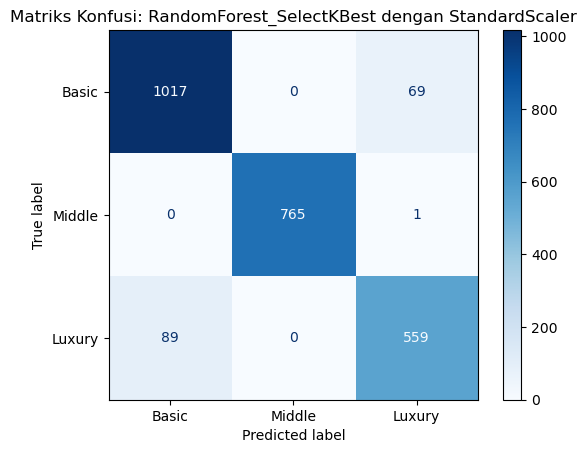

c:\Users\FAHMY\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 9 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\FAHMY\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Model: RandomForest_SelectPercentile
Parameter Terbaik: {'classifier__max_depth': 20, 'classifier__n_estimators': 1000, 'feature_selection__percentile': 25}
Fitur yang Terpilih:
['squaremeters', 'numberofrooms', 'hasyard', 'haspool']

Laporan Klasifikasi:
              precision    recall  f1-score   support

       Basic       0.93      0.94      0.93      1086
      Middle       1.00      1.00      1.00       766
      Luxury       0.89      0.88      0.88       648

    accuracy                           0.94      2500
   macro avg       0.94      0.94      0.94      2500
weighted avg       0.94      0.94      0.94      2500



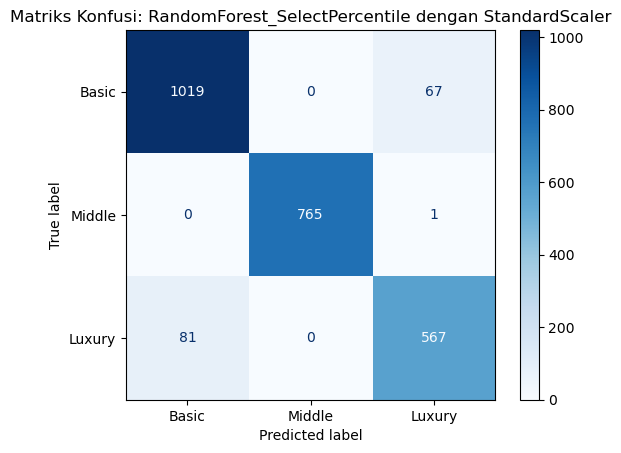

Model: LogisticRegression_SelectKBest
Parameter Terbaik: {'classifier__C': 10, 'feature_selection__k': 5}
Fitur yang Terpilih:
['squaremeters', 'numberofrooms', 'hasyard', 'haspool', 'garage']

Laporan Klasifikasi:
              precision    recall  f1-score   support

       Basic       0.88      0.90      0.89      1086
      Middle       1.00      1.00      1.00       766
      Luxury       0.82      0.79      0.80       648

    accuracy                           0.90      2500
   macro avg       0.90      0.89      0.90      2500
weighted avg       0.90      0.90      0.90      2500



c:\Users\FAHMY\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 9 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\FAHMY\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


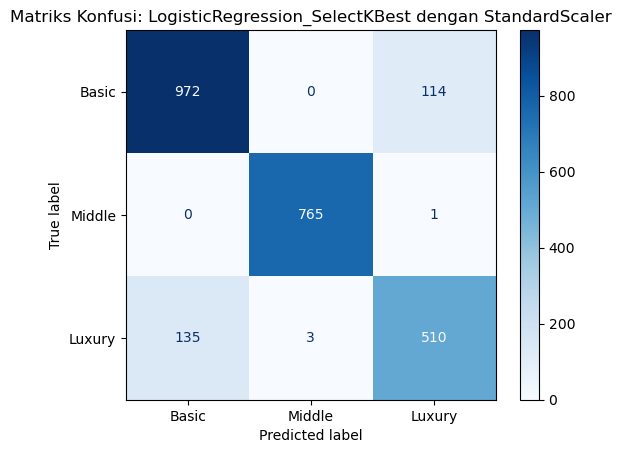

Model: LogisticRegression_SelectPercentile
Parameter Terbaik: {'classifier__C': 10, 'feature_selection__percentile': 25}
Fitur yang Terpilih:
['squaremeters', 'numberofrooms', 'hasyard', 'haspool']

Laporan Klasifikasi:
              precision    recall  f1-score   support

       Basic       0.88      0.90      0.89      1086
      Middle       1.00      1.00      1.00       766
      Luxury       0.82      0.79      0.80       648

    accuracy                           0.90      2500
   macro avg       0.90      0.90      0.90      2500
weighted avg       0.90      0.90      0.90      2500



c:\Users\FAHMY\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 9 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\FAHMY\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


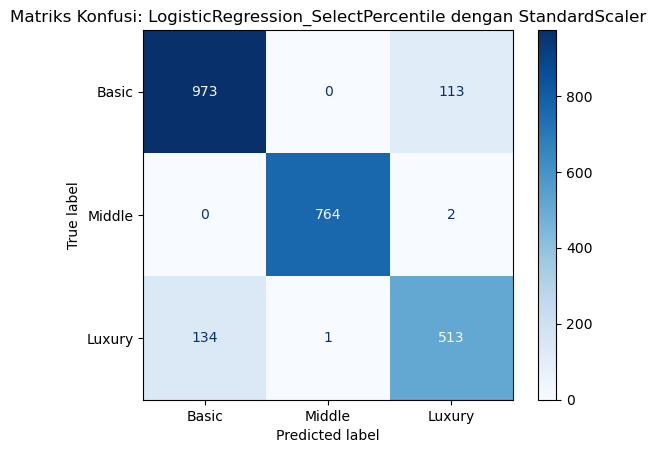


---- Evaluasi model MinMaxScaler ----



In [ ]:
def evaluasi_model(pipelines, X_train, X_test, y_train, y_test, scaler_name):
    print(f"\n---- Evaluasi model {scaler_name} ----\n")
    for model_name, pipeline in pipelines.items():
        grid_search = GridSearchCV(pipeline, param_grid[model_name], cv=skf, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        y_pred = grid_search.predict(X_test)
        
        print(f"Model: {model_name}")
        print("Parameter Terbaik:", grid_search.best_params_)
        print("Fitur yang Terpilih:")
        feature_mask = grid_search.best_estimator_.named_steps['feature_selection'].get_support()
        selected_features = X_train.columns[feature_mask].tolist()
        print(selected_features)
        
        print("\nLaporan Klasifikasi:")
        print(classification_report(y_test, y_pred, target_names=['Basic', 'Middle', 'Luxury']))
        
        matrix = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['Basic', 'Middle', 'Luxury'])
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f"Matriks Konfusi: {model_name} dengan {scaler_name}")
        plt.show()



skf = StratifiedKFold(n_splits=5)

evaluasi_model(pipelines_standard, X_train, X_test, y_train, y_test, "StandardScaler")
evaluasi_model(pipelines_minmax, X_train, X_test, y_train, y_test, "MinMaxScaler")

In [2]:
import pickle

best_model = pipelines_standard['RandomForest_SelectKBest']

best_model.fit(X_train, y_train)

with open('BestModel_RandomForest_StandardScaler_SelectKBest.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Model terbaik berhasil disimpan sebagai 'BestModel_RandomForest_StandardScaler_SelectKBest.pkl'")


NameError: name 'pipelines_standard' is not defined